In [15]:
%matplotlib inline
import torch
from d2l import torch as d2l
from torch import nn

#从零开始实现
def dropout_layer(X,dropout):
    assert 0<= dropout <=1
    if dropout==0:
        return X
    if dropout==1:
        return torch.zeros_like(X)
    mask=(torch.rand(X.shape)>dropout).float()
    return mask*X/(1.0-dropout)

In [2]:
X=torch.arange(16,dtype=torch.float32).reshape((2,8))
print(X)
print(dropout_layer(X,0.))
print(dropout_layer(X,0.5))
print(dropout_layer(X,1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
        [16.,  0., 20., 22., 24., 26., 28.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [3]:
num_inputs,num_hiddens1,num_hiddens2,num_outputs=784,256,256,10

In [7]:
dropout1,dropout2=0.2,0.5
class Net(nn.Module):
    def __init__(self,num_inputs,num_hiddens1,num_hiddens2,num_outputs,is_train=True):
        super(Net,self).__init__()
        self.num_inputs=num_inputs
        self.training=is_train
        self.lin1=nn.Linear(num_inputs,num_hiddens1)
        self.lin2=nn.Linear(num_hiddens1,num_hiddens2)
        self.lin3=nn.Linear(num_hiddens2,num_outputs)
        self.relu=nn.ReLU()
    
    def forward(self,X):
        A1=self.relu(self.lin1(X.reshape(-1,self.num_inputs)))
        if self.train==True:
            A1=dropout_layer(A1,dropout1)
        A2=self.relu(self.lin2(A1))
        if self.train==True:
            A2=dropout_layer(A2,dropout2)
        return self.lin3(A2)
    
    
net=Net(num_inputs,num_hiddens1,num_hiddens2,num_outputs)

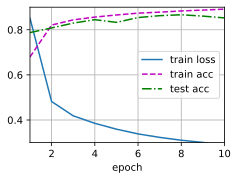

In [8]:
num_epochs,batch_size,lr=10,256,0.5
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
loss=nn.CrossEntropyLoss()
trainer=torch.optim.SGD(net.parameters(),lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

In [12]:
#简洁实现
net=nn.Sequential(nn.Flatten(),
                  nn.Linear(784,256),
                  nn.Dropout(dropout1),
                  nn.ReLU(),
                  nn.Linear(256,256),
                  nn.ReLU(),
                  nn.Dropout(dropout2),
                  nn.Linear(256,10))

def init_weights(m):
    if(type(m)==nn.Linear):
        nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights);
    

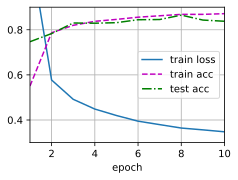

In [13]:
trainer=torch.optim.SGD(net.parameters(),lr=lr) #重新定义一次是为了清零梯度
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

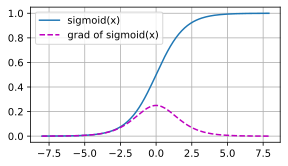

In [16]:
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=torch.sigmoid(x)
y.backward(torch.ones_like(x))
d2l.plot(x.detach().numpy(),[y.detach().numpy(),x.grad.numpy()],legend=['sigmoid(x)','grad of sigmoid(x)'],figsize=(4.5,2.5))

In [18]:
M=torch.normal(0,1,size=(4,4))
print('M=',M)
for i in range(100):
    M=torch.mm(M,torch.normal(0,1,size=(4,4)))
    
print('乘以100个矩阵后：',M)

M= tensor([[-0.2882,  1.0220, -0.0553,  1.8553],
        [-0.5151,  1.1433, -0.4038,  0.9401],
        [ 0.5429, -0.2766,  0.2181, -0.4763],
        [ 0.6173, -1.1137, -0.8611,  0.3804]])
乘以100个矩阵后： tensor([[ 2.5066e+24,  1.2912e+25,  4.6843e+24,  1.7854e+24],
        [-1.3953e+24, -7.1860e+24, -2.6074e+24, -9.9368e+23],
        [ 1.2385e+24,  6.3785e+24,  2.3143e+24,  8.8201e+23],
        [ 7.1271e+24,  3.6710e+25,  1.3319e+25,  5.0761e+24]])
